 <center><h1>Telecom Churn - Case Study</h1></center>
  
Building models to predict churn which serves below purposes:

- To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


In [1]:
#ohm shree vinayaka
import pandas as pd
import numpy as np
telecom_df=pd.read_csv("telecom_churn_data.csv")
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


__Data Analysis__

-  Having 226 columns, hence need to do coloumn analysis 
-  Having huge number of missing values, hence need to handle missing data

In [2]:
telecom_df.shape

(99999, 226)

In [3]:
telecom_df.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

__Column Analysis__

-  Column loc_og_mou=loc_og_t2t+loc_og_t2m+loc_og_t2f+loc_og_t2c_mou
-  Hence keeping only loc_og_t2c_mou and dropping t2t,t2m,t2f,t2c columns
-  Simillarly dropping t2t,t2m,t2f,t2c coloumns for std_og,loc_ic_std_ic columns 

In [4]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_og_t2t_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_og_t2m_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_og_t2f_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_og_t2c_mou_')))]

In [5]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_og_t2t_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_og_t2m_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_og_t2f_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_og_t2c_mou_')))]

telecom_df.shape

(99999, 194)

In [6]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_ic_t2t_mou')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_ic_t2m_mou')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_ic_t2f_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_ic_t2t_mou')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_ic_t2m_mou')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_ic_t2f_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_ic_t2o_mou_')))]
telecom_df.shape


(99999, 170)

__Column Analysis__

-  Column total_ic_mou=loc_ic_mou+std_ic_mou+spl_ic_mou+isd_ic_mou_ic_others
-  Keeping total_ic_mou column alone and removing loc_ic,std_ic,spl_ic,ic_others column, 
   since incoming calls are free
-  Since out going call charges are differnt for loc, std and isd,keeping loc_oc_mou,std_oc_mou,spl_oc_mou,isd_oc_mou columns and dropping total_oc_mou

In [7]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='loc_ic_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='std_ic_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='spl_ic_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='isd_ic_mou_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='ic_others_')))]


__Column Analysis__

-  Onnet columns includes all kinds of calls with in the same network
-  Offnet columns includes all kinds of calls outside n/w. 
   since all these info is already captured in other columns, dropping these

In [8]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='onnet_mou')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='offnet_mou')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='count_rech')))]


__Column Analysis__

- Dropping the columns which has same values in all 


In [9]:
telecom_df=telecom_df.drop(telecom_df.columns[telecom_df.apply(lambda col: col.nunique()<2)], axis=1)

In [10]:
telecom_df.shape

(99999, 122)

In [11]:
telecom_df.isnull().sum()

mobile_number           0
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
roam_ic_mou_6        3937
roam_ic_mou_7        3859
roam_ic_mou_8        5378
roam_ic_mou_9        7745
roam_og_mou_6        3937
roam_og_mou_7        3859
roam_og_mou_8        5378
roam_og_mou_9        7745
loc_og_mou_6         3937
loc_og_mou_7         3859
loc_og_mou_8         5378
loc_og_mou_9         7745
std_og_mou_6         3937
std_og_mou_7         3859
std_og_mou_8         5378
std_og_mou_9         7745
isd_og_mou_6         3937
isd_og_mou_7         3859
isd_og_mou_8         5378
isd_og_mou_9         7745
spl_og_mou_6         3937
spl_og_mou_7         3859
spl_og_mou_8         5378
spl_og_mou_9         7745
og_others_6          3937
                    ...  
arpu_2g_9           74077
night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
monthly_2g_6            0
monthly_2g_7            0
monthly_2g_8

__Treating Missing values__

-  Replacing all null with previous month value for further calculations.

-  Replacing all NA with 0 for other columns

In [12]:
import datetime as dt
telecom_df['date_of_last_rech_6']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_6'],errors='coerce').
                                             fillna('2014-05-01'),format='%Y-%m-%d')
telecom_df['date_of_last_rech_7']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_7'],errors='coerce').
                                             fillna(telecom_df['date_of_last_rech_6']),format='%Y-%m-%d')
telecom_df['date_of_last_rech_8']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_8'],errors='coerce').
                                             fillna(telecom_df['date_of_last_rech_7']),format='%Y-%m-%d')
telecom_df['date_of_last_rech_9']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_9'],errors='coerce').
                                             fillna(telecom_df['date_of_last_rech_8']),format='%Y-%m-%d')
telecom_df['date_of_last_rech_data_6']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_data_6'],errors='coerce').
                                        fillna('2014-05-01'),format='%Y-%m-%d')
telecom_df['date_of_last_rech_data_7']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_data_7'],errors='coerce').
                                             fillna(telecom_df['date_of_last_rech_data_6']),format='%Y-%m-%d')
telecom_df['date_of_last_rech_data_8']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_data_8'],errors='coerce').
                                             fillna(telecom_df['date_of_last_rech_data_7']),format='%Y-%m-%d')
telecom_df['date_of_last_rech_data_9']=pd.to_datetime(pd.to_datetime(telecom_df['date_of_last_rech_data_9'],errors='coerce').
                                             fillna(telecom_df['date_of_last_rech_data_8']),format='%Y-%m-%d')


In [13]:
telecom_df.fillna(0,inplace=True)   
telecom_df.isnull().sum()  

mobile_number       0
arpu_6              0
arpu_7              0
arpu_8              0
arpu_9              0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_ic_mou_9       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
roam_og_mou_9       0
loc_og_mou_6        0
loc_og_mou_7        0
loc_og_mou_8        0
loc_og_mou_9        0
std_og_mou_6        0
std_og_mou_7        0
std_og_mou_8        0
std_og_mou_9        0
isd_og_mou_6        0
isd_og_mou_7        0
isd_og_mou_8        0
isd_og_mou_9        0
spl_og_mou_6        0
spl_og_mou_7        0
spl_og_mou_8        0
spl_og_mou_9        0
og_others_6         0
                   ..
arpu_2g_9           0
night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
monthly_2g_9        0
sachet_2g_6         0
sachet_2g_7         0
sachet_2g_8         0
sachet_2g_9         0
monthly_3g_6        0
monthly_3g

__Derived Columns__

-  New columns derived **no_days_last_rech_data** from the **date_of_last_rech_data** and keeing as int
-  Dropping date columns


In [14]:
start_date = dt.datetime(2014, 7, 1)
telecom_df['no_days_last_rech_data_6']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_data_6']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df[['no_days_last_rech_data_6','date_of_last_rech_data_6']].head()


,no_days_last_rech_data_6,date_of_last_rech_data_6
0,10,2014-06-21
1,61,2014-05-01
2,61,2014-05-01
3,61,2014-05-01
4,27,2014-06-04


In [15]:
import datetime as dt

start_date = dt.datetime(2014, 7, 1)
telecom_df['no_days_last_rech_6']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_6']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_data_6']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_data_6']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_data_6'].head()



0    10
1    61
2    61
3    61
4    27
Name: no_days_last_rech_data_6, dtype: int64

In [16]:
start_date = dt.datetime(2014, 8, 1)
telecom_df['no_days_last_rech_7']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_7']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_data_7']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_data_7']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_7'].head()

0    16
1     1
2     8
3     1
4     4
Name: no_days_last_rech_7, dtype: int64

In [17]:
start_date = dt.datetime(2014, 9, 1)
telecom_df['no_days_last_rech_8']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_8']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_data_8']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_data_8']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_8'].head()

0    24
1     4
2    18
3     1
4    23
Name: no_days_last_rech_8, dtype: int64

In [18]:
start_date = dt.datetime(2014, 10, 1)
telecom_df['no_days_last_rech_9']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_9']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_data_9']=((start_date-pd.DatetimeIndex(telecom_df['date_of_last_rech_data_9']))/(np.timedelta64(1, 'D'))).astype(int)
telecom_df['no_days_last_rech_9'].head()

0    3
1    1
2    2
3    1
4    3
Name: no_days_last_rech_9, dtype: int64

In [19]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='date_of_last_rech_')))]

__Derived Columns__

-  New columns derived **data_pack** by combining all the avilable data_pack
-  Dropping other columns


In [20]:
telecom_df['data_pack_6']=telecom_df['night_pck_user_6']+telecom_df['monthly_2g_6']+telecom_df['monthly_3g_6']+telecom_df['sachet_2g_6']+telecom_df['sachet_3g_6']+telecom_df['fb_user_6']+telecom_df['jun_vbc_3g']
telecom_df['data_pack_7']=telecom_df['night_pck_user_7']+telecom_df['monthly_2g_7']+telecom_df['monthly_3g_7']+telecom_df['sachet_2g_7']+telecom_df['sachet_3g_7']+telecom_df['fb_user_7']+telecom_df['jul_vbc_3g']
telecom_df['data_pack_8']=telecom_df['night_pck_user_8']+telecom_df['monthly_2g_8']+telecom_df['monthly_3g_8']+telecom_df['sachet_2g_8']+telecom_df['sachet_3g_8']+telecom_df['fb_user_8']+telecom_df['aug_vbc_3g']
telecom_df['data_pack_9']=telecom_df['night_pck_user_9']+telecom_df['monthly_2g_9']+telecom_df['monthly_3g_9']+telecom_df['sachet_2g_9']+telecom_df['sachet_3g_9']+telecom_df['fb_user_9']+telecom_df['sep_vbc_3g']


In [21]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='night_pck_user_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='monthly_2g_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='monthly_3g_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='sachet_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='fb_user_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='_vbc_')))]
telecom_df.shape


(99999, 98)

__Derived Columns__

-  New columns derived **arpu_total** by combining all the arpu and arpu_data
-  Dropping other columns


In [22]:
telecom_df['arputotal_6']=telecom_df['arpu_6']+telecom_df['arpu_2g_6']+telecom_df['arpu_3g_6']
telecom_df['arputotal_7']=telecom_df['arpu_7']+telecom_df['arpu_2g_7']+telecom_df['arpu_3g_7']
telecom_df['arputotal_8']=telecom_df['arpu_8']+telecom_df['arpu_2g_8']+telecom_df['arpu_3g_8']
telecom_df['arputotal_9']=telecom_df['arpu_9']+telecom_df['arpu_2g_9']+telecom_df['arpu_3g_9']


In [23]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='arpu_')))]

__Filtering High Value customers__

-  Since we have av_rech_amt for data not total
-  Converting total_reach_amt_data=av_rech_amt*total_rech_data
-  Deriving New columns **total_recharge_amt=total_reach_amt_data+total_rech_amt_6**
-  Filtering  more then 75 percentile of recharge amount of  good months data
-  Getting around 30K row data


In [24]:
telecom_df['total_reach_amt_data_6']=telecom_df['av_rech_amt_data_6']*(telecom_df['total_rech_data_6'])
telecom_df['total_reach_amt_data_7']=telecom_df['av_rech_amt_data_7']*(telecom_df['total_rech_data_7'])
telecom_df['total_reach_amt_data_8']=telecom_df['av_rech_amt_data_8']*(telecom_df['total_rech_data_8'])
telecom_df['total_reach_amt_data_9']=telecom_df['av_rech_amt_data_9']*(telecom_df['total_rech_data_9'])


In [25]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='av_rech_amt_data_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='total_rech_data_')))]

In [26]:
telecom_df['total_recharge_amt_6']=telecom_df['total_reach_amt_data_6']+telecom_df['total_rech_amt_6']
telecom_df['total_recharge_amt_7']=telecom_df['total_reach_amt_data_7']+telecom_df['total_rech_amt_7']
telecom_df['total_recharge_amt_8']=telecom_df['total_reach_amt_data_8']+telecom_df['total_rech_amt_8']
telecom_df['total_recharge_amt_9']=telecom_df['total_reach_amt_data_9']+telecom_df['total_rech_amt_9']


In [27]:
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='total_reach_amt_data_')))]
telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='total_rech_amt_')))]

In [28]:
telecom_df['total_rec_goodmonth'] = (telecom_df['total_recharge_amt_6'] + telecom_df['total_recharge_amt_7'])/2

In [29]:
percentile = telecom_df['total_rec_goodmonth'].quantile(0.7)
percentile

478.0

In [30]:
telecom_df= telecom_df[telecom_df['total_rec_goodmonth'] >= percentile]
telecom_df.shape

(30001, 83)

__Deriving Churn Column__

-  If there is no o/g cal, or data usage in 9th month then customer is considerd to be churned
-  There is around 8% of churn data
- Dropping all the data related to churn phase

In [31]:
telecom_df['churn'] =((telecom_df.total_ic_mou_9 == 0) & (telecom_df.total_og_mou_9 == 0) &(telecom_df.vol_2g_mb_9 == 0) &(telecom_df.vol_3g_mb_9 == 0) ).map({True:1,False:0})

In [32]:
telecom_df['churn'].describe()

count    30001.000000
mean         0.081364
std          0.273398
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [33]:
churn = (sum(telecom_df['churn'])/len(telecom_df['churn'].index))*100
churn

8.136395453484884

In [34]:
print(sum(telecom_df['churn']))

2441


In [35]:
#removing all 9 months records..

telecom_df = telecom_df[telecom_df.columns.drop(list(telecom_df.filter(regex='_9')))]
telecom_df.shape

(30001, 64)

__Considring few important Variables for Univarient Analysis__

- There is no much difference in the mean and median,
- No much outliers present

In [36]:
arpu_tot_telecom = telecom_df[['arputotal_6','arputotal_7','arputotal_8']]
arpu_tot_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arputotal_6,arputotal_7,arputotal_8
count,30001.000000,30001.000000,30001.000000
mean,688.937831,694.104957,629.766737
std,630.504641,653.233906,663.318229
min,-2258.709000,-2014.045000,-945.808000
25%,361.773000,364.515000,268.270000
50%,552.513000,553.716000,492.498000
75%,830.564000,830.784000,785.541000
90%,1267.170000,1276.332000,1262.077000
95%,1663.397000,1686.199000,1689.665000
99%,2942.390000,2997.685000,2994.168000


In [37]:
tot_rech_amt_telecom = telecom_df[['total_recharge_amt_6','total_recharge_amt_7','total_recharge_amt_8']]
tot_rech_amt_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,total_recharge_amt_6,total_recharge_amt_7,total_recharge_amt_8
count,30001.000000,30001.000000,30001.000000
mean,1116.509509,1188.731748,1047.618398
std,1566.112291,1632.174907,1804.608844
min,0.000000,0.000000,0.000000
25%,546.000000,550.000000,396.000000
50%,788.000000,812.000000,688.000000
75%,1210.000000,1267.000000,1152.000000
90%,2012.000000,2180.000000,2038.000000
95%,2906.000000,3150.000000,3043.000000
99%,6305.000000,7163.000000,6816.000000


In [38]:
tot_og_mou_telecom = telecom_df[['total_og_mou_6','total_og_mou_7','total_og_mou_8']]
tot_og_mou_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,30001.000000,30001.000000,30001.000000
mean,609.866251,628.366047,551.678812
std,690.873430,717.219171,700.478180
min,0.000000,0.000000,0.000000
25%,116.580000,116.490000,72.360000
50%,410.630000,425.590000,333.540000
75%,858.760000,891.440000,774.780000
90%,1447.080000,1481.160000,1359.590000
95%,1913.480000,1951.760000,1857.080000
99%,3195.290000,3280.960000,3219.810000


In [39]:
tot_ic_mou_telecom = telecom_df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']]
tot_ic_mou_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,30001.000000,30001.000000,30001.000000
mean,289.950496,296.756987,279.922931
std,365.523475,373.747232,361.175175
min,0.000000,0.000000,0.000000
25%,72.880000,78.990000,61.360000
50%,183.730000,187.580000,173.110000
75%,371.990000,377.310000,361.730000
90%,665.110000,673.230000,650.230000
95%,922.080000,929.310000,915.690000
99%,1736.010000,1801.410000,1725.940000


In [40]:
roam_ic_mou_telecom = telecom_df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']]
roam_ic_mou_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
count,30001.000000,30001.000000,30001.000000
mean,16.110355,12.642504,12.500551
std,76.302156,75.785903,74.125281
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,27.390000,14.290000,15.010000
95%,84.540000,55.640000,56.350000
99%,342.440000,280.460000,282.190000


In [41]:
roam_oc_mou_telecom = telecom_df[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']]
roam_oc_mou_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,30001.000000,30001.000000,30001.000000
mean,26.571547,20.152086,19.865615
std,116.205525,96.100428,104.719009
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,50.430000,31.090000,28.880000
95%,145.410000,104.240000,100.510000
99%,530.710000,438.590000,427.030000


In [42]:
no_of_days_telecom = telecom_df[['aon','no_days_last_rech_8','data_pack_8']]
no_of_days_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,aon,no_days_last_rech_8,data_pack_8
count,30001.000000,30001.000000,30001.000000
mean,1209.368754,6.073764,171.249223
std,957.677989,7.688940,421.572465
min,180.000000,1.000000,0.000000
25%,460.000000,2.000000,0.000000
50%,846.000000,4.000000,2.000000
75%,1756.000000,7.000000,131.580000
90%,2793.000000,13.000000,584.630000
95%,3140.000000,21.000000,941.380000
99%,3651.000000,40.000000,1970.650000


In [43]:
telecom_df.shape

(30001, 64)

__Bi-Varient Analysis__

-  As per correlation matrix there is lot of co-related variables 
- montly data _6,_7,_8 are all co-related to each other
- Hence applying PCA 

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(telecom_df.corr(),annot = True)

__Handling Class Imbalance__

- Since we only have 8% churn data of intrest,non churn data will get more attention
- Applying down sampling to handle this
- We tested even with upsampling also, up sampling will also yield same 
  result and sampling data will almost double, hence considring only downsampling
- With downsampling we could get the Churn percentage of 49.5%

In [45]:
from sklearn.utils import resample
df_majority = telecom_df[telecom_df.churn==0]
df_minority = telecom_df[telecom_df.churn==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2500,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
churn_ds = (sum(df_downsampled['churn'])/len(df_downsampled['churn'].index))*100
# Showing ratio
print("Percentage of churn transactions: ", len(df_downsampled[df_downsampled.churn == 1])/len(df_downsampled))
print("Percentage of normal transactions: ", len(df_downsampled[df_downsampled.churn == 0])/len(df_downsampled))
print("Total number of transactions in resampled data: ", len(df_downsampled))

Percentage of churn transactions:  0.49402954867435744
Percentage of normal transactions:  0.5059704513256426
Total number of transactions in resampled data:  4941


__Normalizing the data__

- Since we have all continous variables with differnt scale,
  we need to scale the data for better results, Other wise high vaue scale will get more priority
- Applying standard scaling


In [46]:
df_cvs=df_downsampled.drop(['churn','mobile_number'],axis=1)
normalized_df=(df_cvs-df_cvs.mean())/df_cvs.std()
normalized_df.head()   

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,...,data_pack_6,data_pack_7,data_pack_8,arputotal_6,arputotal_7,arputotal_8,total_recharge_amt_6,total_recharge_amt_7,total_recharge_amt_8,total_rec_goodmonth
79690,-0.200599,-0.183943,-0.183549,-0.233734,-0.250134,-0.215698,0.515181,-0.141575,-0.097855,0.712498,...,-0.355067,-0.365984,-0.315043,-0.278797,-0.306150,-0.023213,-0.170355,-0.410265,-0.083839,-0.344514
46049,-0.200599,0.164601,-0.183549,-0.233734,0.974410,-0.215698,0.150197,0.370206,1.225823,-0.230107,...,0.236356,0.910184,2.464362,-0.051423,0.238342,0.970756,0.043523,0.007146,0.879057,0.029863
3185,-0.200599,-0.183943,-0.183549,-0.233734,-0.250134,-0.215698,-0.234486,0.047911,0.151229,-0.457276,...,3.403073,2.530077,3.226993,-0.274391,-0.284546,0.088261,0.373392,-0.266490,0.079269,0.061029
51542,-0.080097,-0.146282,0.079228,0.201251,-0.204268,0.074471,-0.060636,0.032573,-0.222774,-0.254014,...,-0.355067,-0.365984,-0.315043,-0.377669,-0.469385,-0.246270,-0.408370,-0.365874,-0.243898,-0.458129
74239,-0.200599,-0.183943,-0.183549,-0.233734,-0.250134,-0.215698,-0.192762,-0.525434,-0.480011,-0.591820,...,-0.337044,-0.333549,-0.288836,-0.721375,-0.742661,-0.597397,-0.126775,1.624447,0.487801,0.892627


__Splitting the data into training and test __

In [47]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = normalized_df
# Putting response variable to y
y = df_downsampled['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

__Applying PCA to the varaibles__

-  There are of co-related varables which we cant apply directly

In [48]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [49]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [50]:
pca.components_

array([[ 1.14583037e-02,  2.48449645e-02,  2.22905590e-02, ...,
         1.91494577e-01,  1.81167502e-01,  2.06215283e-01],
       [ 1.14782549e-02,  2.35463439e-02,  2.91452606e-02, ...,
         8.75862452e-02,  1.04476429e-01,  8.00688804e-02],
       [ 1.70853852e-01,  1.91276876e-01,  1.56216776e-01, ...,
        -1.02961210e-01, -1.46650517e-01, -1.01881367e-01],
       ...,
       [ 1.94907047e-07, -3.46577785e-07,  3.37696971e-07, ...,
        -1.27015556e-07,  5.97663956e-07, -1.15505917e-07],
       [ 3.18085476e-07, -4.36079352e-07,  1.01953940e-07, ...,
         1.84705650e-08, -2.69552405e-07,  3.86760967e-08],
       [-1.24286627e-16,  3.02563699e-16, -2.10002799e-16, ...,
        -4.56565222e-01, -9.12569857e-17,  7.66801328e-01]])

In [51]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.011458,0.011478,roam_ic_mou_6
1,0.024845,0.023546,roam_ic_mou_7
2,0.022291,0.029145,roam_ic_mou_8
3,0.008556,0.025465,roam_og_mou_6
4,0.030257,0.050933,roam_og_mou_7


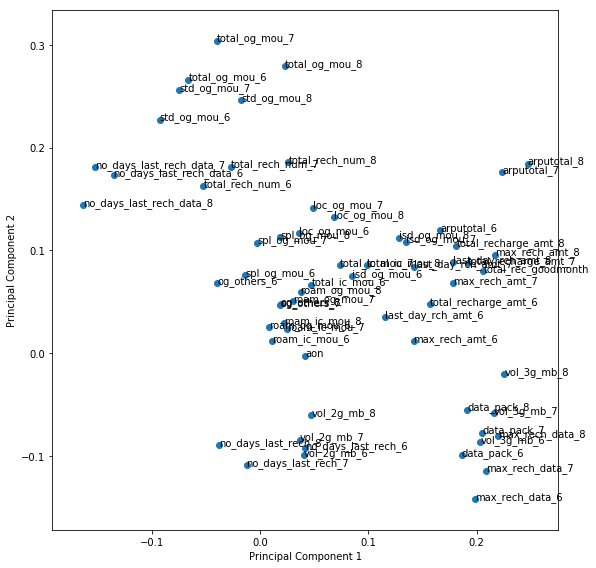

In [52]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [53]:
pca.explained_variance_ratio_

array([1.31435457e-01, 1.06762777e-01, 7.12463384e-02, 5.83004656e-02,
       5.09076330e-02, 4.80639250e-02, 4.57543915e-02, 4.15404770e-02,
       3.07921834e-02, 2.86808818e-02, 2.56723429e-02, 2.34208495e-02,
       2.10468055e-02, 1.99684547e-02, 1.88100965e-02, 1.84362536e-02,
       1.61087488e-02, 1.48040032e-02, 1.42758786e-02, 1.39462375e-02,
       1.32478586e-02, 1.21388768e-02, 1.13140537e-02, 1.08927652e-02,
       1.01020493e-02, 9.67403507e-03, 9.50398510e-03, 8.76177188e-03,
       8.55897075e-03, 7.48026311e-03, 6.80825794e-03, 6.46116145e-03,
       6.26532035e-03, 6.19286197e-03, 5.87805718e-03, 5.37923704e-03,
       5.03285858e-03, 4.88733987e-03, 4.60350220e-03, 4.52847649e-03,
       4.32810912e-03, 4.09836017e-03, 3.85627523e-03, 3.67772263e-03,
       3.21777606e-03, 3.03515392e-03, 2.82748010e-03, 2.75962043e-03,
       2.50709988e-03, 1.98284589e-03, 1.76433012e-03, 1.66413796e-03,
       1.59238176e-03, 1.56402612e-03, 1.26170702e-03, 1.17716317e-03,
      

__Making the screeplot - plotting the cumulative variance against the number of components__

-  As per plot we could see that 30 variables are capturing the 90% of variance.
   Hence considring with 30 variables to run PCA


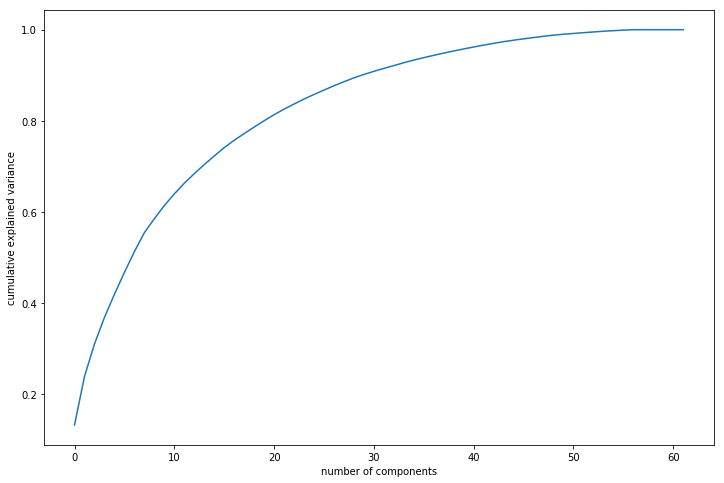

In [54]:

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [56]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(3458, 30)

In [57]:
corrmat = np.corrcoef(df_train_pca.transpose())

__Running Co-relation Matrix after PCA__

-  Co-Relation matrix looks perfect after applying PCA__
-  We could see that all varibels are independent

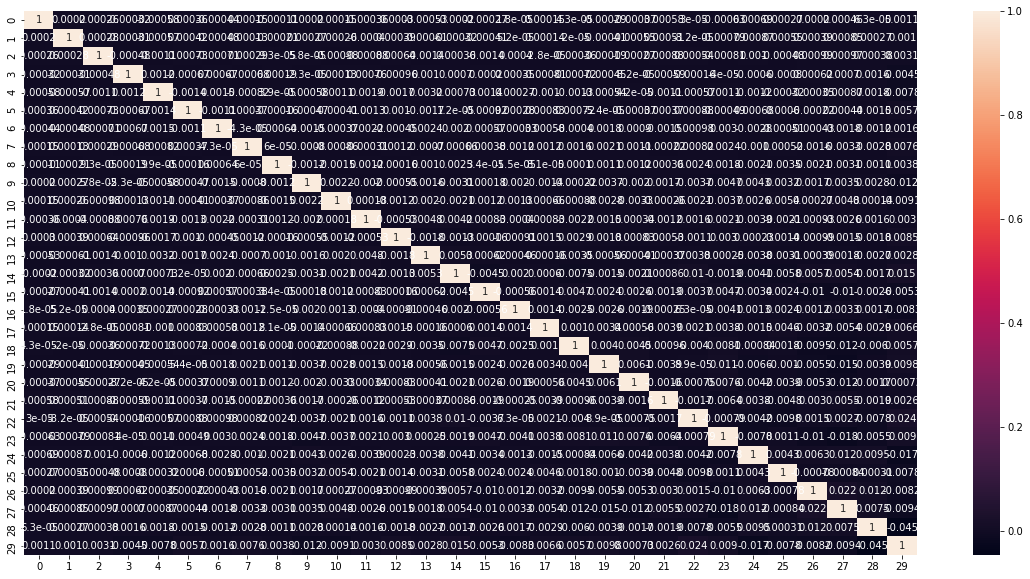

In [58]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [59]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1483, 30)

__Running Random Forest Model__

- Choosing the below parametrs and runnig grid to get best parameters
- Since we are more intrested in churn predection,scoring parameter is choosen as precision
- We could get best Tuned parameters  max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)
- Running  Random forest with the tuned parameters


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="precision")

In [61]:
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

__We could get 80% precision__

In [62]:
print('We can get precision of',grid_search.best_score_,'using',grid_search.best_params_)


We can get precision of 0.8098929810839132 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=200)


In [64]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
predictions = rfc.predict(df_test_pca)

__Model Evualation__

- We are getting 74% sensitivity , 80% precesion with this model 
- False positive predection rate is also less . Its just 0.17%

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.82      0.81       761
          1       0.80      0.78      0.79       722

avg / total       0.80      0.80      0.80      1483



In [68]:
# Let us calculate 
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test,predictions))
print("recall", metrics.recall_score(y_test,predictions))

[[623 138]
 [162 560]] 

accuracy 0.7977073499662846
precision 0.8022922636103151
recall 0.775623268698061


In [69]:
confusion=confusion_matrix(y_test,predictions)    
print(confusion)

[[623 138]
 [162 560]]


In [70]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))

Sensitivity 0.775623268698061


In [72]:
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))

Positive Predection Rate 0.8022922636103151


In [73]:
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))

Negative Predection rate 0.7936305732484077


In [74]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

False positive Predection Rate 0.18134034165571616


__Running Logestic Regression Model__

- Getting the Churn_prob
- Choosing the cutoff point with the graph


In [75]:
import statsmodels.api as sm
df_train_pca_sm = sm.add_constant(df_train_pca)
log_mod_pce = sm.GLM(y_train,(sm.add_constant(df_train_pca_sm)), family = sm.families.Binomial())
mod_res_pce = log_mod_pce.fit()
log_mod_pce.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3458
Model:                            GLM   Df Residuals:                     3427
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1466.2
Date:                Sun, 10 Mar 2019   Deviance:                       2932.3
Time:                        02:02:04   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0224      0.052     -0.433      0.665      -0.124       0.079
x1            -0.3359      0.022    -15.434      0.000      -0.379      -0.293
x2            -0.1332      0.021     -6.309      0.000      -0.175      -0.092
x3             0.4127      0.033     12.621      0.000       0.349       0.477
x4            -0.7207      0.035    -20.348      0.000      -0.790      -0.651
x5            -0.0295      0.069     -0.425      0.671      -0.166       0.107
x6             0.2344      0.084      2.806      0.005       0.071       0.398
x7             0.5001      0.038     13.143      0.000       0.426       0.575
x8             0.1448      0.037      3.900      0.000       0.072       0.218
x9             0.1247      0.043      2.893      0.004       0.040       0.209
x10           -0.0485      0.061     -0.797      0.425      -0.168       0.071
x11           -0.3561      0.064     -5.569      0.000      -0.481      -0.231
x12            0.2377      0.047      5.038      0.000       0.145       0.330
x13            0.0237      0.055      0.428      0.669      -0.085       0.132
x14            0.2042      0.056      3.663      0.000       0.095       0.313
x15           -0.3320      0.072     -4.603      0.000      -0.473      -0.191
x16            0.0381      0.054      0.709      0.478      -0.067       0.143
x17            0.1237      0.081      1.535      0.125      -0.034       0.282
x18           -0.4059      0.066     -6.125      0.000      -0.536      -0.276
x19           -0.0671      0.069     -0.975      0.329      -0.202       0.068
x20           -0.4696      0.064     -7.385      0.000      -0.594      -0.345
x21           -0.1556      0.056     -2.771      0.006      -0.266      -0.046
x22           -0.1412      0.060     -2.352      0.019      -0.259      -0.024
x23            0.0547      0.066      0.823      0.410      -0.075       0.185
x24           -0.2235      0.073     -3.045      0.002      -0.367      -0.080
x25            0.3322      0.067      4.953      0.000       0.201       0.464
x26            0.0661      0.066      1.005      0.315      -0.063       0.195
x27            0.2820      0.070      4.008      0.000       0.144       0.420
x28            0.4399      0.076      5.782      0.000       0.291       0.589
x29           -0.3086      0.080     -3.878      0.000      -0.465      -0.153
x30           -0.3017      0.084     -3.575      0.000      -0.467      -0.136
==============================================================================
"""

In [76]:
# Getting the predicted values on the train set
y_train_pred = mod_res_pce.predict(df_train_pca_sm)
y_train_pred[:10]


array([0.40433137, 0.95643919, 0.96088201, 0.73301954, 0.88526034,
       0.27050575, 0.22625596, 0.05743723, 0.23643457, 0.09309304])

In [77]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})      

In [78]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.404331,1,1,1,1,1,0,0,0,0,0
1,1,0.956439,1,1,1,1,1,1,1,1,1,1
2,0,0.960882,1,1,1,1,1,1,1,1,1,1
3,1,0.733020,1,1,1,1,1,1,1,1,0,0
4,1,0.885260,1,1,1,1,1,1,1,1,1,0


In [79]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.497108  1.000000  0.000000
0.1   0.1  0.633603  0.976149  0.294997
0.2   0.2  0.719780  0.948807  0.493387
0.3   0.3  0.777906  0.909831  0.647499
0.4   0.4  0.815211  0.866783  0.764232
0.5   0.5  0.824465  0.810355  0.838413
0.6   0.6  0.819549  0.749273  0.889017
0.7   0.7  0.794101  0.660849  0.925819
0.8   0.8  0.737420  0.517161  0.955147
0.9   0.9  0.655003  0.324026  0.982174


-  As per below graph ideal cuttoff point is 0.5
- Hence considring 0.5 for making decesion


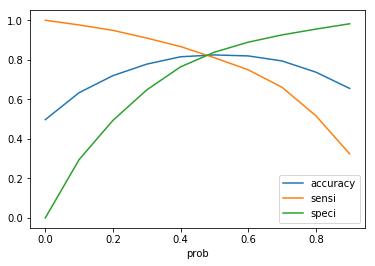

In [80]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.404331,1,1,1,1,1,0,0,0,0,0,0
1,1,0.956439,1,1,1,1,1,1,1,1,1,1,1
2,0,0.960882,1,1,1,1,1,1,1,1,1,1,1
3,1,0.733020,1,1,1,1,1,1,1,1,0,0,1
4,1,0.885260,1,1,1,1,1,1,1,1,1,0,1


In [82]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.824465008675535

__Predecting on test data__

- As per test data we could get Sensitivity of around 80%
- We could get 82% precesion
- False postive Rate is also less its around 1.7%

In [83]:
X_test_sm = sm.add_constant(df_test_pca)

In [84]:
y_test_pred = mod_res_pce.predict(X_test_sm)

In [85]:
y_test_pred_pca = pd.DataFrame(y_test_pred)


In [86]:
y_test_df = pd.DataFrame(y_test)
y_test_pred_pca.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [87]:
y_pred_final_pca = pd.concat([y_test_df, y_test_pred_pca],axis=1)
y_pred_final_pca= y_pred_final_pca.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final_pca.head()

,churn,Churn_Prob
0,1,0.896697
1,1,0.703161
2,0,0.063915
3,1,0.973444
4,0,0.006227


In [89]:
y_pred_final_pca['final_predicted'] = y_pred_final_pca.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [90]:
print(metrics.confusion_matrix(y_pred_final_pca.churn,y_pred_final_pca.final_predicted ), "\n")
print("accuracy", metrics.accuracy_score(y_pred_final_pca.churn,y_pred_final_pca.final_predicted))
print("precision", metrics.precision_score(y_pred_final_pca.churn,y_pred_final_pca.final_predicted))
print("sensitivity/recall", metrics.recall_score(y_pred_final_pca.churn,y_pred_final_pca.final_predicted))

[[627 134]
 [130 592]] 

accuracy 0.8219824679703304
precision 0.8154269972451791
sensitivity/recall 0.8199445983379502


In [91]:
confusion_pca = metrics.confusion_matrix(y_pred_final_pca.churn, y_pred_final_pca.final_predicted )
confusion_pca

array([[627, 134],
       [130, 592]], dtype=int64)

In [92]:
TP = confusion_pca[1,1] # true positive 
TN = confusion_pca[0,0] # true negatives
FP = confusion_pca[0,1] # false positives
FN = confusion_pca[1,0] # false negatives

In [93]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17608409986859397


In [94]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8154269972451791


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8282694848084544


In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

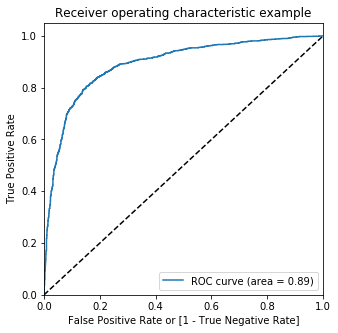

In [98]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

__Considring SVM Model__
- Running SVM grid with various gamma and C parameters



In [99]:
from sklearn.svm import SVC
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [100]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.798632,0.158391,0.153031,0.048066,1,0.01,"{'C': 1, 'gamma': 0.01}",0.845376,0.815029,0.810694,...,0.834297,0.020098,3,0.866233,0.869125,0.872740,0.865920,0.860137,0.866831,0.004152
1,0.730445,0.059111,0.147559,0.013221,1,0.001,"{'C': 1, 'gamma': 0.001}",0.823699,0.807803,0.789017,...,0.821862,0.022021,9,0.829718,0.828633,0.835141,0.823997,0.820383,0.827575,0.005049
2,1.126822,0.125970,0.231729,0.038373,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.777457,0.796243,0.760116,...,0.792944,0.022456,11,0.799349,0.803688,0.798265,0.785688,0.784243,0.794247,0.007806
3,0.712907,0.058635,0.101870,0.005749,10,0.01,"{'C': 10, 'gamma': 0.01}",0.846821,0.825145,0.810694,...,0.836322,0.019193,1,0.918294,0.917570,0.918294,0.917239,0.903867,0.915053,0.005608
4,0.794846,0.207168,0.131555,0.024962,10,0.001,"{'C': 10, 'gamma': 0.001}",0.829480,0.815029,0.809249,...,0.828224,0.014964,7,0.849241,0.850325,0.849602,0.847850,0.839537,0.847311,0.003969
5,0.804756,0.067805,0.138195,0.005206,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.823699,0.812139,0.786127,...,0.823887,0.024647,8,0.828995,0.829356,0.833333,0.821829,0.817492,0.826201,0.005720
6,1.366227,0.255964,0.112701,0.008587,100,0.01,"{'C': 100, 'gamma': 0.01}",0.819364,0.797688,0.796243,...,0.810295,0.011820,10,0.957339,0.964208,0.960954,0.957355,0.954102,0.958792,0.003469
7,0.826297,0.081082,0.131295,0.018505,100,0.001,"{'C': 100, 'gamma': 0.001}",0.841040,0.822254,0.813584,...,0.835165,0.014935,2,0.879610,0.873825,0.879971,0.870257,0.868811,0.874495,0.004623
8,0.618142,0.069441,0.108993,0.010214,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.822254,0.815029,0.804913,...,0.829092,0.019229,6,0.842733,0.840202,0.843456,0.837730,0.830502,0.838925,0.004670
9,2.177178,0.112688,0.092566,0.007100,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.794798,0.786127,0.774566,...,0.782244,0.007699,12,0.992408,0.993131,0.994215,0.992049,0.991326,0.992626,0.000985


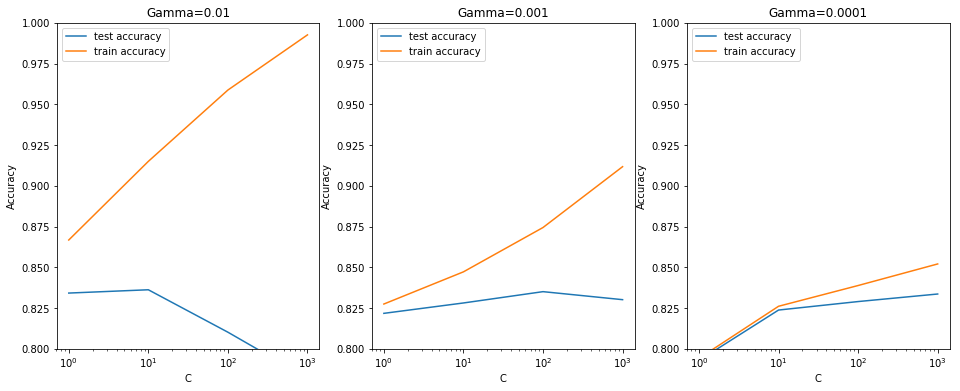

In [101]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

__Selection of best parameter__

-  As per the graph best score 82% is got with best best parameter is C=1000 and gamma=0.0001
- We get around 82% precision and 80% sensitivity

In [102]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8363215731636784 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [103]:
# specify optimal hyperparameters
# model
model = SVC(C=1000, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrprint(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))


accuracy 0.8341200269723533
precision 0.8352112676056338
sensitivity/recall 0.8213296398891967


### Conclusion for Objective-1 : As per above Stats of different models (Logistic Regression, Random Forest and SVM, SVM yields better results for sensitivity and precision. We are suggesting to use SVM model to predict whether a high-value customer will churn or not, in near future (i.e. churn phase).

__Running Model with out PCA and with RFE__

  **Co-relation Variables Analysis**
-  As per co-relation matrix there are lot of co-relation b/w the loc_og_mou_6,7,8.
   Simillarly b/w std_o, loc_ic_mou.So considring average recharge b/w 6th and 7th month as good months variable
- total_og_mou is the sum of all og_mou(loc,std,isd etc) so dropping total_og_mou
- Since we have max_rech_amt and total_rech_amount, keeping only total_recharge_amt alone, since there is high  co-realation b/w them
- Keeping the average data of two months as good month data and retaining 8th month data



In [104]:
df_downsampled.head()

,mobile_number,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,data_pack_7,data_pack_8,arputotal_6,arputotal_7,arputotal_8,total_recharge_amt_6,total_recharge_amt_7,total_recharge_amt_8,total_rec_goodmonth,churn
79690,7000898237,0.00,0.00,0.00,0.00,0.00,0.00,401.18,154.71,122.64,...,0.00,0.00,550.688,461.306,455.489,896.0,458.0,575.0,677.0,0
46049,7001520073,0.00,37.76,0.00,0.00,164.46,0.00,272.59,326.54,526.89,...,472.15,954.53,703.345,829.878,1079.267,1215.0,1088.0,2470.0,1151.5,0
3185,7001846088,0.00,0.00,0.00,0.00,0.00,0.00,137.06,218.33,198.71,...,1071.47,1216.44,553.646,475.930,525.446,1707.0,675.0,896.0,1191.0,0
51542,7000886814,12.33,4.08,26.88,67.68,6.16,40.16,198.31,213.18,84.49,...,0.00,0.00,484.306,350.811,315.507,541.0,525.0,260.0,533.0,0
74239,7001414438,0.00,0.00,0.00,0.00,0.00,0.00,151.76,25.83,5.93,...,12.00,9.00,253.544,165.828,95.153,961.0,3529.0,1700.0,2245.0,0


In [105]:
df_downsampled['loc_og_good']=(df_downsampled['loc_og_mou_6']+df_downsampled['loc_og_mou_7'])/2
df_downsampled['std_og_good']=(df_downsampled['std_og_mou_6']+df_downsampled['std_og_mou_7'])/2
df_downsampled['isd_og_good']=(df_downsampled['isd_og_mou_6']+df_downsampled['isd_og_mou_7'])/2
df_downsampled['spl_og_good']=(df_downsampled['spl_og_mou_6']+df_downsampled['spl_og_mou_7'])/2
df_downsampled['roamic_mou_good']=(df_downsampled['roam_ic_mou_6']+df_downsampled['roam_ic_mou_7'])/2
df_downsampled['roamoc_mou_good']=(df_downsampled['roam_og_mou_6']+df_downsampled['roam_og_mou_7'])/2
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='_og_mou_6')))]
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='_og_mou_7')))]
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='_ic_mou_6')))]
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='_ic_mou_7')))]


In [106]:
#df_downsampled['total_ic_good']=(df_downsampled['total_ic_mou_6']+df_downsampled['total_ic_mou_7'])/2
#df_downsampled['total_ic_good']=(df_downsampled['total_ic_mou_6']+df_downsampled['total_ic_mou_7'])/2
df_downsampled['total_recharge_amount_good']=(df_downsampled['total_recharge_amt_6']+df_downsampled['total_recharge_amt_7'])/2
df_downsampled=df_downsampled.drop(['total_recharge_amt_6','total_recharge_amt_7'],axis=1)

In [107]:
df_downsampled['total_og_others']=(df_downsampled['og_others_6']+df_downsampled['og_others_7']+df_downsampled['og_others_8'])
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='og_others_')))]

In [108]:
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='og_others_')))]

In [109]:
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='max_rech_')))]

In [110]:
df_downsampled = df_downsampled[df_downsampled.columns.drop(list(df_downsampled.filter(regex='total_rech_num_')))]

In [111]:
df_downsampled=df_downsampled.drop(['total_rec_goodmonth'],axis=1)


In [112]:
df_downsampled['data_pack_good']=(df_downsampled['data_pack_6']+df_downsampled['data_pack_7'])/2
df_downsampled['vol_3g_good']=(df_downsampled['vol_3g_mb_6']+df_downsampled['vol_3g_mb_7'])/2
df_downsampled['vol_2g_good']=(df_downsampled['vol_2g_mb_6']+df_downsampled['vol_2g_mb_7'])/2
df_downsampled['arpu_tot_good']=(df_downsampled['arputotal_6']+df_downsampled['arputotal_7'])/2
df_downsampled['no_days_last_rech_good']=(df_downsampled['no_days_last_rech_6']+df_downsampled['no_days_last_rech_7'])/2




In [113]:
df_downsampled=df_downsampled.drop(['total_og_mou_8'],axis=1)

In [114]:
df_downsampled=df_downsampled.drop(['no_days_last_rech_6','no_days_last_rech_7'],axis=1)

In [115]:
df_downsampled=df_downsampled.drop(['data_pack_6','data_pack_7','vol_3g_mb_6','vol_2g_mb_6','vol_3g_mb_7','vol_2g_mb_7','arputotal_6','arputotal_7'],axis=1)

__Co Relation Matrix after data clean up__

- We could see that lot of corelations are removed with this and data is clean and ready to run RFE

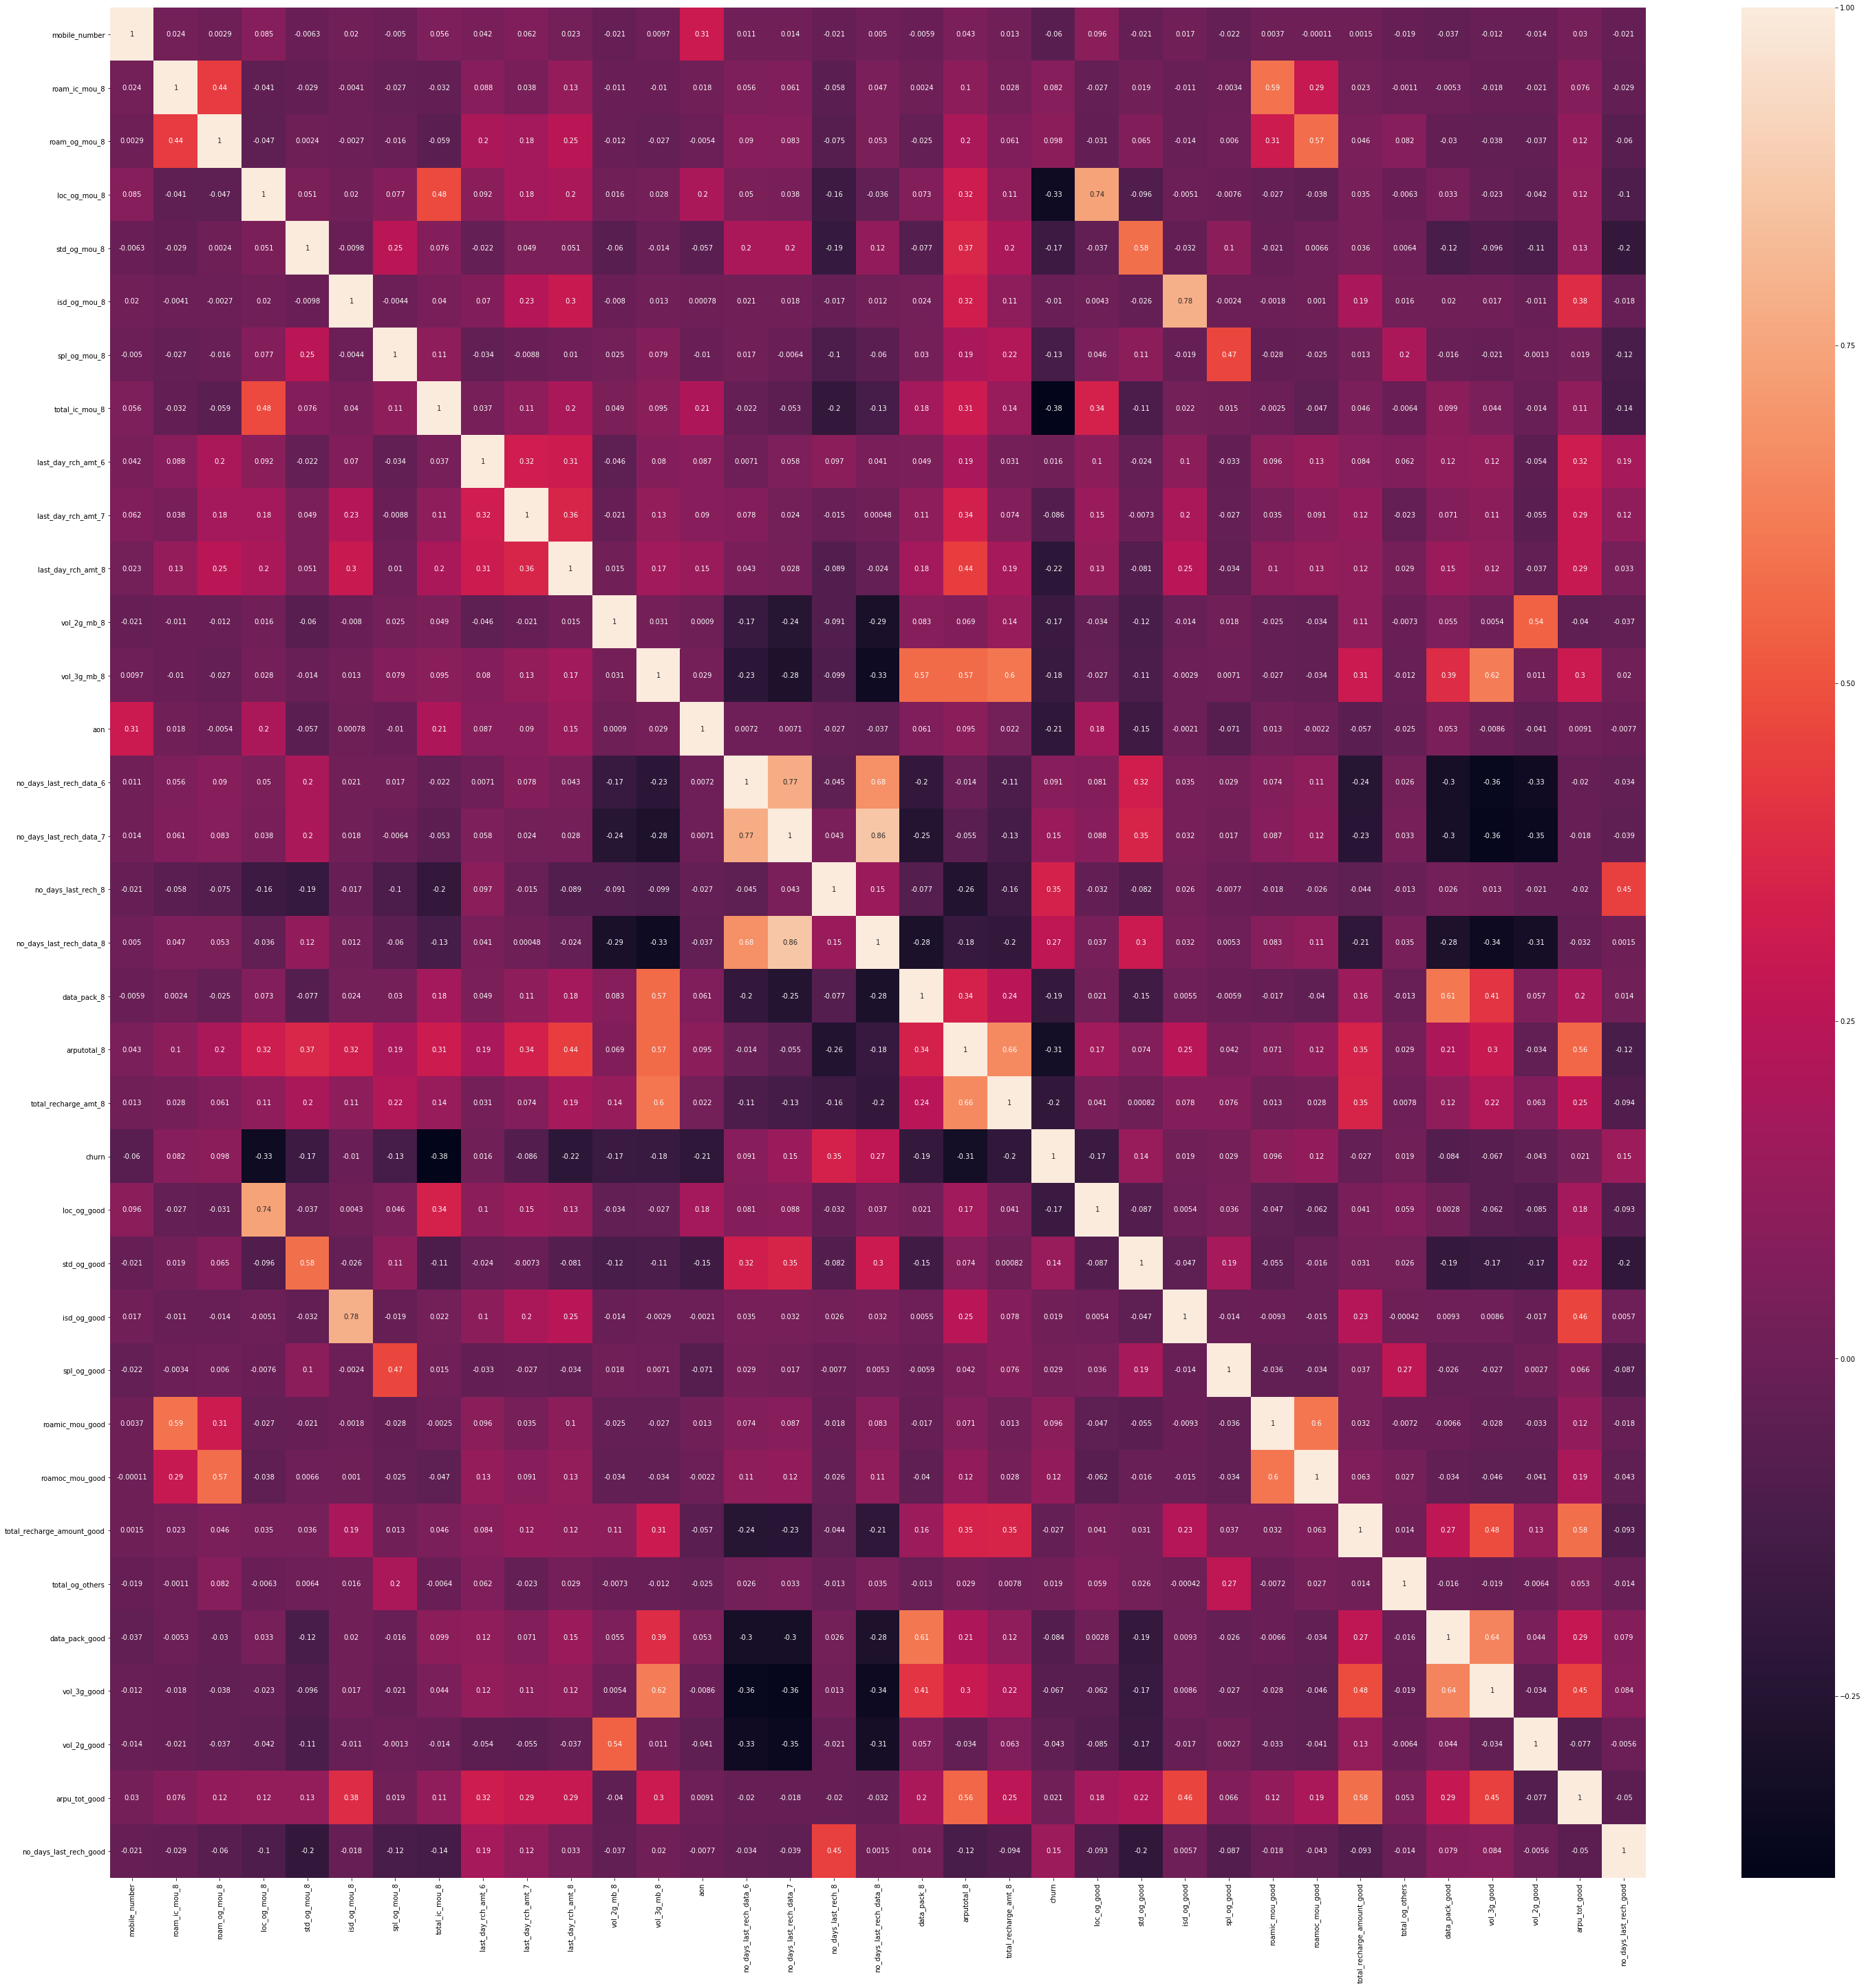

In [116]:
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(df_downsampled.corr(),annot = True)

__Normalizing the data__

In [117]:
df_rfe_norm_rfe=df_downsampled.drop(['churn','mobile_number'],axis=1)
normalized_df_rfe=(df_rfe_norm_rfe-df_rfe_norm_rfe.mean())/df_rfe_norm_rfe.std()
normalized_df_rfe.head() 

,roam_ic_mou_8,roam_og_mou_8,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,spl_og_good,roamic_mou_good,roamoc_mou_good,total_recharge_amount_good,total_og_others,data_pack_good,vol_3g_good,vol_2g_good,arpu_tot_good,no_days_last_rech_good
79690,-0.183549,-0.215698,-0.097855,0.507913,-0.057017,-0.298212,0.070953,0.820994,0.832167,-0.467038,...,-0.407584,-0.213117,-0.268617,-0.344514,-0.086783,-0.398622,-0.415725,-0.406663,-0.346312,-0.074313
46049,-0.183549,-0.215698,1.225823,0.115676,-0.057017,0.213631,0.487100,0.052807,0.226527,0.586531,...,0.302974,-0.014189,0.362833,0.029863,-0.086783,0.625025,0.377401,-0.075507,0.111344,-0.175884
3185,-0.183549,-0.215698,0.151229,-0.185756,-0.057017,-0.298212,2.743729,0.956557,0.642522,1.265807,...,-0.408489,-0.213117,-0.268617,0.061029,-0.086783,3.292988,1.497720,0.005758,-0.330874,-0.582169
51542,0.079228,0.074471,-0.222774,-0.314431,-0.057017,0.183262,-0.225435,0.052807,0.214292,-0.120469,...,-0.408489,-0.126665,0.014894,-0.458129,-0.086783,-0.398622,-0.415725,-0.406663,-0.501616,-0.277455
74239,-0.183549,-0.215698,-0.480011,-0.446980,-0.057017,-0.298212,0.651778,-0.495898,-0.415818,-0.293754,...,-0.408489,-0.213117,-0.268617,0.892627,-0.086783,-0.370911,-0.192470,-0.406248,-0.866653,-0.683741


__Splitting the data to train and test__

In [118]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = normalized_df_rfe

# Putting response variable to y
y = df_downsampled['churn']

y.head()

79690    0
46049    0
3185     0
51542    0
74239    0
Name: churn, dtype: int64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

__Running RFE__

-  Choosing 15 important variables


In [120]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True  True  True False False  True False False  True False False
  True False  True  True  True  True False  True  True  True False False
  True False False False False False False  True False]
[13  1  1  1  5 11  1 16 15  1  2 17  1 14  1  1  1  1 19  1  1  1  8 12
  1  4 10 18  6  9  3  1  7]


In [121]:
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_ic_mou_8',
       'last_day_rch_amt_8', 'aon', 'no_days_last_rech_data_7',
       'no_days_last_rech_8', 'no_days_last_rech_data_8', 'data_pack_8',
       'total_recharge_amt_8', 'loc_og_good', 'std_og_good', 'roamic_mou_good',
       'arpu_tot_good'],
      dtype='object')

__Running Logestic regression model__

In [122]:
import statsmodels.api as sm
df_train_rfe = sm.add_constant(X_train[col])
log_mod_rfe = sm.GLM(y_train,df_train_rfe, family = sm.families.Binomial())
mod_res_rfe = log_mod_rfe.fit()
log_mod_rfe.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3458
Model:                            GLM   Df Residuals:                     3442
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1470.5
Date:                Sun, 10 Mar 2019   Deviance:                       2941.0
Time:                        02:05:28   Pearson chi2:                 5.81e+03
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0714      0.055     -1.289      0.197      -0.180       0.037
roam_og_mou_8                0.4607      0.106      4.344      0.000       0.253       0.669
loc_og_mou_8                -0.8086      0.147     -5.491      0.000      -1.097      -0.520
std_og_mou_8                -0.6098      0.086     -7.072      0.000      -0.779      -0.441
total_ic_mou_8              -0.8369      0.108     -7.767      0.000      -1.048      -0.626
last_day_rch_amt_8          -0.3664      0.069     -5.281      0.000      -0.502      -0.230
aon                         -0.2877      0.051     -5.620      0.000      -0.388      -0.187
no_days_last_rech_data_7    -0.3096      0.105     -2.950      0.003      -0.515      -0.104
no_days_last_rech_8          0.9180      0.089     10.334      0.000       0.744       1.092
no_days_last_rech_data_8     0.4966      0.106      4.678      0.000       0.289       0.705
data_pack_8                 -0.3305      0.071     -4.646      0.000      -0.470      -0.191
total_recharge_amt_8        -0.7040      0.158     -4.454      0.000      -1.014      -0.394
loc_og_good                  0.3030      0.099      3.050      0.002       0.108       0.498
std_og_good                  0.5954      0.089      6.655      0.000       0.420       0.771
roamic_mou_good              0.3233      0.097      3.334      0.001       0.133       0.513
arpu_tot_good                0.4019      0.068      5.880      0.000       0.268       0.536
============================================================================================
"""

In [123]:
# Getting the predicted values on the train set
y_train_pred = mod_res_rfe.predict(df_train_rfe)
y_train_pred[:10]

15653    0.410092
6291     0.924824
3595     0.934658
94049    0.786243
29957    0.983459
12132    0.337063
81231    0.221086
90189    0.018802
94384    0.331740
50148    0.036159
dtype: float64

In [124]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
15653,0,0.410092
6291,1,0.924824
3595,0,0.934658
94049,1,0.786243
29957,1,0.983459


In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
15653,0,0.410092,1,1,1,1,1,0,0,0,0,0
6291,1,0.924824,1,1,1,1,1,1,1,1,1,1
3595,0,0.934658,1,1,1,1,1,1,1,1,1,1
94049,1,0.786243,1,1,1,1,1,1,1,1,0,0
29957,1,0.983459,1,1,1,1,1,1,1,1,1,1


In [126]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.497108  1.000000  0.000000
0.1   0.1  0.642279  0.972659  0.315699
0.2   0.2  0.721226  0.950553  0.494537
0.3   0.3  0.775014  0.916812  0.634848
0.4   0.4  0.809427  0.876091  0.743531
0.5   0.5  0.827935  0.827807  0.828062
0.6   0.6  0.820706  0.747528  0.893042
0.7   0.7  0.784268  0.639325  0.927545
0.8   0.8  0.724986  0.491565  0.955722
0.9   0.9  0.650087  0.312973  0.983324


__With the below graph optimal cutoff point is 0.5__

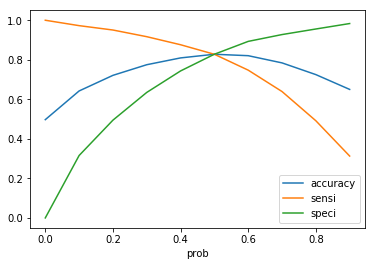

In [127]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
15653,0,0.410092,1,1,1,1,1,0,0,0,0,0,0
6291,1,0.924824,1,1,1,1,1,1,1,1,1,1,1
3595,0,0.934658,1,1,1,1,1,1,1,1,1,1,1
94049,1,0.786243,1,1,1,1,1,1,1,1,0,0,1
29957,1,0.983459,1,1,1,1,1,1,1,1,1,1,1


In [129]:
X_test_sm = sm.add_constant(X_test[col])


__Predecting on Test data__

In [130]:
y_test_pred = mod_res_rfe.predict(X_test_sm)

In [131]:
y_test_pred_rfe = pd.DataFrame(y_test_pred)

In [132]:
y_test_df = pd.DataFrame(y_test)
y_test_pred_rfe.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [133]:
y_pred_final_rfe = pd.concat([y_test_df, y_test_pred_rfe
                         ],axis=1)

In [134]:
y_pred_final_rfe= y_pred_final_rfe.rename(columns={ 0 : 'Churn_Prob'})

In [135]:
y_pred_final_rfe['final_predicted'] = y_pred_final_rfe.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final_rfe.head()

,churn,Churn_Prob,final_predicted
0,1,0.866207,1
1,1,0.651829,1
2,0,0.058268,0
3,1,0.976034,1
4,0,0.002486,0


__On running RFE for variable selection and with Logestic regression Model
we could get Precision :80%, Sensitivity:81%__

In [136]:
# Let's check the overall accuracy.
print(metrics.confusion_matrix(y_pred_final_rfe.churn,y_pred_final_rfe.final_predicted ), "\n")
print("accuracy", metrics.accuracy_score(y_pred_final_rfe.churn,y_pred_final_rfe.final_predicted))
print("precision", metrics.precision_score(y_pred_final_rfe.churn,y_pred_final_rfe.final_predicted))
print("recall", metrics.recall_score(y_pred_final_rfe.churn,y_pred_final_rfe.final_predicted))

[[620 141]
 [114 608]] 

accuracy 0.8280512474713418
precision 0.8117489986648865
recall 0.8421052631578947


In [137]:
confusion_rfe = metrics.confusion_matrix(y_pred_final_rfe.churn, y_pred_final_rfe.final_predicted )
confusion_rfe

array([[620, 141],
       [114, 608]], dtype=int64)

In [138]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive rate",FP/ float(TN+FP))

False positive rate 0.17608409986859397


In [139]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity is ",TP / float(TP+FN))

Sensitivity is  0.8199445983379502


In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
 fpr, tpr, thresholds = metrics.roc_curve(y_pred_final_rfe.churn, y_pred_final_rfe.Churn_Prob, drop_intermediate = False )

__Area Under Curve is 89% which is pretty decent__

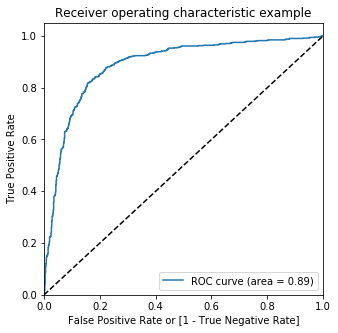

In [142]:
draw_roc(y_pred_final_rfe.churn, y_pred_final_rfe.Churn_Prob)

#### Conclusion to Objective - 2: Important Features to consider-'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_ic_mou_8', 'last_day_rch_amt_8', 'aon', 'no_days_last_rech_data_7','no_days_last_rech_8', 'no_days_last_rech_data_8', 'data_pack_8', 'total_recharge_amt_8', 'loc_og_good', 'std_og_good', 'roamic_mou_good','arpu_tot_good'

OG:outgoing
IC:Incoming

- roam_og_mou_8,loc_og_mou_8,std_og_mou_8,'total_ic_mou_8',std_og_good,loc_og_good,roamic_mou_good :
- Better the more recent out going or incoming calls, customers are not likely to churn.Customers with less OG and IC calls are likely to churn, it is preferrable to offer special plans to retain them

- 'no_days_last_rech_data_7','no_days_last_rech_8', 'no_days_last_rech_data_8': 
- More recent recharge are less likely to churn, Need to address those customers who have not recharged recently.It is preferrable to offer special plans to retain them
